In [66]:
import numpy as np
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from nfm_utils import NMF
np.random.seed(42)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Load Datasets
sirf_uncorrel = np.load('../datasets/sigmoid_irf_uncorrel.npy')
sirf_correl = np.load('../datasets/sigmoid_irf_correl.npy')
fexp_uncorrel = np.load('../datasets/floored_exp_uncorrel.npy')
fexp_correl = np.load('../datasets/floored_exp_correl.npy')
students_uncorrel = np.load('../datasets/students_uncorrel.npy')  # Used for result calculations
questions_uncorrel = np.load('../datasets/questions_uncorrel.npy')  # Used for result calculations
students_correl = np.load('../datasets/students_correl.npy')  # Used for result calculations
questions_correl = np.load('../datasets/questions_correl.npy')  # Used for result calculations

In [81]:
def accuracy(R_pred, R_true):
    R_pred_cpy = np.copy(R_pred)
    R_pred_cpy[R_pred_cpy > 0.5] = 1
    R_pred_cpy[R_pred_cpy <= 0.5] = 0
    print("Accuracy: {}".format(np.sum(R_pred_cpy == R_true) / (R_true.shape[0]*R_true.shape[1])))

# NMF

Run Nonnegative Matrix Factorization on each dataset. We get the predicted W and H (questions and students, respectively), and the resulting R (responses). We show the Norm of the difference between R and R_true for each k we calculate. Then we also get the RMS of the difference between W and W_true and H and H_true. Note that we choose the best alpha and beta we find for each dataset. 

## Sigmoid IRF Uncorrel

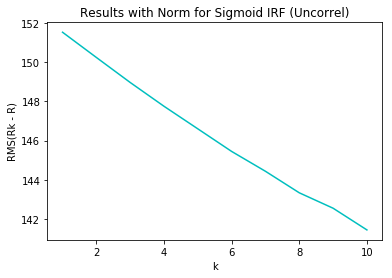

In [82]:
nmf_su = NMF(sirf_uncorrel, 'Sigmoid IRF (Uncorrel)', alpha=0.01, beta=10)
sols_su = nmf_su.run_all()

In [83]:
nmf_su.print_rms_results(1, students_uncorrel, questions_uncorrel)

RMS for Students (H): 0.415, RMS for Questions (W): 0.339


In [84]:
accuracy(sols_su[1][0].T, sirf_uncorrel)

Accuracy: 0.62331


## Sigmoid IRF Correl

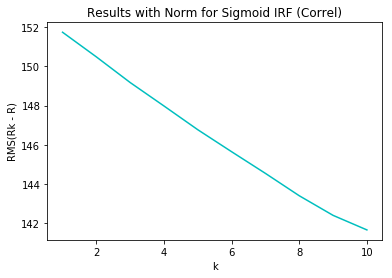

In [85]:
nmf_sc = NMF(sirf_correl, 'Sigmoid IRF (Correl)', alpha=0.001, beta=100)
sols_sc = nmf_sc.run_all()

In [86]:
nmf_sc.print_rms_results(5, students_correl, questions_correl)

RMS for Students (H): 0.364, RMS for Questions (W): 0.359


In [87]:
accuracy(sols_sc[5][0].T, sirf_correl)

Accuracy: 0.65693


## Floored Exponential Uncorrel

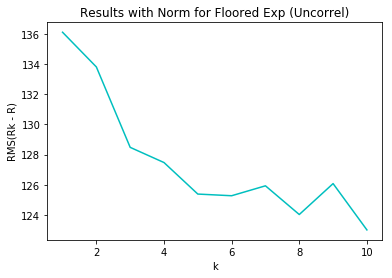

In [88]:
nmf_fu = NMF(fexp_uncorrel, 'Floored Exp (Uncorrel)', alpha=100, beta=1)
sols_fu = nmf_fu.run_all()

In [89]:
nmf_fu.print_rms_results(1, students_uncorrel, questions_uncorrel)

RMS for Students (H): 0.089, RMS for Questions (W): 0.519


In [90]:
accuracy(sols_fu[1][0].T, fexp_uncorrel)

Accuracy: 0.74497


## Floored Exponential Correl

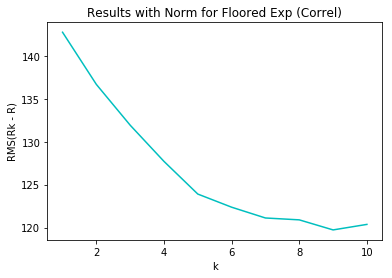

In [91]:
best_alpha, best_beta = 0.01, 100
nmf_fc = NMF(fexp_correl, 'Floored Exp (Correl)', alpha=0.1, beta=10)
sols_fc = nmf_fc.run_all()

In [92]:
nmf_fc.print_rms_results(5, students_correl, questions_correl)

RMS for Students (H): 0.375, RMS for Questions (W): 0.406


In [93]:
accuracy(sols_fc[5][0].T, fexp_correl)

Accuracy: 0.78504


# Trials with Cophenetic Correlation Coefficient

CCC is used when we want to appriximate the true k, but we are still unsure how to approach the problem.

In [94]:
# Get best k with cophenetic correlation 
# TODO: NEED TO UNDERSTAND CCC BETTER, WE SHOULD INCORPORATE INFO BETWEEN Rk and R 
best = (None, float('Inf'))
results = []
for k, Rk in sols_fc.items():
    Z = linkage(Rk)
    c, coph_dists = cophenet(Z, pdist(Rk))
    results.append((k, c))

ValueError: setting an array element with a sequence.

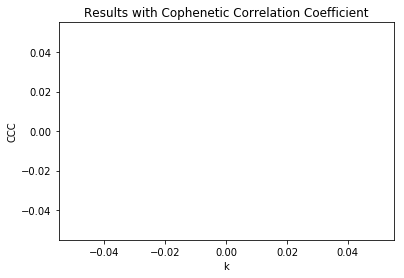

In [95]:
plt.plot(*zip(*results), color='c')
plt.title('Results with Cophenetic Correlation Coefficient')
plt.xlabel('k')
plt.ylabel('CCC')
plt.show()

In [46]:
Z = linkage(R)
c, coph_dists = cophenet(Z, pdist(R))
print(c)

NameError: name 'R' is not defined